## What is model validation?

Model validation is the process of evaluating the predictive capability of a ML model on new data points. By using good model validation techniques, we can estimate the performance of a ML model with reasonable confidence prior to its use in practice. Before we dive into the details of model validation, we will briefly consider **overfitting** in order to show why model validation is necessary.

Suppose that we want to predict a label $y$ of data points based on their features $\mathbf{x}$. In order to do this, we choose a ML model and train it on a set of labelled data by minimizing the average loss of its predictions. A naive approach we might then take to estimate the performance of the trained model is to calculate its training error, which we assume to be equivalent to the average loss. Unfortunately, this approach is highly problematic and leads to overly optimistic estimates of the model's predictive capabilities.

The training error is a poor estimate of a model's predictive performance because it is calculated on the same dataset that was used to train the model. Since this dataset only represents a small sample of all available data points, it is likely that a predictor that minimizes the average loss on the training set happens to fit this dataset particularly well. Consequently, the average loss on the training set will, in general, overestimate the performance of the model. This phenomenon is referred to as **overfitting**, because the trained model fits the training set overly well.

While some degree of overfitting is typically present when applying a ML model to a prediction problem, it is a particularly significant issue when applying ML models with large hypothesis spaces that contain complex predictor functions (in relation to the size of the dataset). In such cases, a model that seemingly fits the data very well might turn out to perform very poorly on data points not in the training set.

As a final note, it is worth emphasizing that the optimal complexity of the predictor function is generally dependent on the dataset's size. A deep neural network might generalize well when trained on a huge dataset, whereas even a linear model using many features might be prone to severe overfitting on a small dataset.

### Basic Model Validation

The simplest scheme for validating the predictive performance of a ML model is to train the model on only some of the available labelled data, and use the rest to validate the performance of the trained model. Typically, the dataset used for training is referred to as the **training set**, and the data used for validation is referred to as the **validation set**. 

Assume that we have a dataset $\mathbb{X}$ at our disposal, and that we wish to train a ML model that can predict the label $y$ of data points based on their features $\mathbf{x}$. To be able to later validate the performance of the model, we will first split the dataset $\mathbb{X}$ into a training set denoted by $\mathbb{X}^{(t)}$ and a validation set denoted by $\mathbb{X}^{(v)}$. The recommended size of the validation set is somewhat context dependent, but a common choice is 20-30% of the entire dataset.

After splitting the dataset, we train our model on the training set by minimizing the average loss. Finally, we calculate the average prediction error on the validation set in order to estimate the performance of our model on new data points. The average prediction error on the validation set is referred to as the **validation error**. 

Next, we will apply this validation scheme to the fictional prediction problem from the previous round, in which we sought to find the best model of a selection of models using a different number of features.

## The Problem 

We revisit the fictional scenario considered in round 2, in which you are an intern at a real estate fund in Helsinki and have been assigned a task of developing a ML model for predicting the median apartment price of different neighborhoods in Helsinki. The following excerpt serves to refresh your memory on the problem formulation:

"*The staff in your group have built a dataset containing features of 20 different neighborhoods. These features include the average number of rooms in the apartments, the percentage of buildings constructed before 1970 in the neighborhood, as well as eight experimental features designed by your colleagues in research. In addition, the fund's domain experts have valued a representative sample of apartments in each of the 20 neighborhoods and have arrived at a reliable estimate for the median apartment price in each one. This valuation has cost the fund a fortune, but the investment will pay off if your ML model can use this information to accurately predict the median apartment value of other neighborhoods at a negligible cost.*

*Let us model the problem of predicting the median home values as a machine learning problem. The data points in this problem are the different neighborhoods, and the label of these is the median apartment price. The features of the neighborhoods were already explicitly referred to in the previous paragraph. Still, it might be worth repeating that the features are properties belonging specifically to the data points.*"

In [1]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()

## Linear Predictors 

Recall that we previously calculated the training errors for a selection of linear regression models that use a different number of features for prediction. We will consider the same models in this round, but we will use more sophisticated methods to validate the performance of each model, and to select the one that outputs the best predictions on new data points. Altogether, we have 10 candidate models, each using the first $r$ features $x_1, x_2, \ldots, x_r$ in the original dataset, with $r$ ranging from 1 to 10, to predict the label $y$ of data points. 

The hypothesis space for a linear regression model using the first $r$ features consists of predictor functions of the form

\begin{equation*}
h^{(\mathbf{w})}(\mathbf{x}) = w_0 + \mathbf{w}^{T} \mathbf{x} = w_0 + \sum_{i=1}^r w_i x_i,
\end{equation*}

where the feature weights $\mathbf{w}=\big(w_1, w_2, \ldots, w_r \big)^T$ and the intercept term $w_0$ are the model parameters. Thus, the search for the best model amounts to the search for the best $r$.

We will start out by repeating the experiment of calculating the training errors for the different candidate models. 

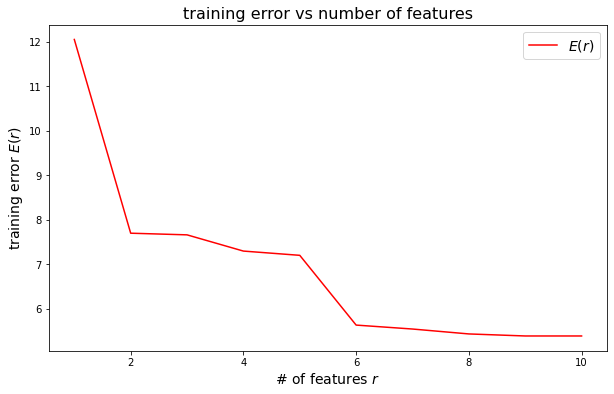

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n = 10                        # maximum number of features used 

X,y = load_housing_data(n=n)  # read in 20 data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training errors

for i in range(n): 
    reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
    reg = reg.fit(X[:,:(i+1)], y)    # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(i+1)])    # compute predictions of best predictors 
    linreg_error[i] = mean_squared_error(y, pred)    # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)    # plot_x contains grid points for x-axis (1,...,n)

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=14)    # Set font size for legends
plt.rc('axes', labelsize=14)     # Set font size for axis labels
plt.figure(figsize=(10,6))       # Set figure size
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features', fontsize=16)
plt.legend()
plt.show()

### Let's Interpret the Results!

In the previous round, we were tempted to conclude that the model using all of the features is the best one based on the graph above. However, you might already have come to doubt this conclusion based on the issues considered earlier. 

As we already discussed, it is not a good idea to use the training error to assess the performance of the optimal predictor since this predictor was found by minimizing the average loss on the training set. 

Furthermore, the more features (larger $r$) we use, the better we will be able to fit the training data $\mathbb{X}^{(t)}$. However, this does not necessarily lead to better performance on new data. A complex model with too many features (large $r$) might only fit the training data very well, and generalize poorly to new data.

Consider the case of $r=m_{\rm train}$, i.e., the number of features is the same as the number of labeled data points in the training set. Under very mild conditions it can be shown that in this case there always exists a linear predictor $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $y^{(i)} = h(\mathbf{x}^{(i)})$, i.e., the training error is exactly zero (see Chapter 7.1 of this [tutorial](https://arxiv.org/abs/1805.05052)  )! 
A better way to evaluate the quality of a predictor is presented next.

##  Using the Validation Error

In this setting, the training error is a bad measure for the performance of the models since it will always favor the ones using more features (larger $r$). A better way to estimate the performance is to use the validation error

\begin{equation}
E_{\rm val}(r) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(r)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}, 
\end{equation} 

which is the MSE of the true and predicted labels of the data points in the validation set.

Since a lower validation error suggests better predictive capabilities on new data points, the best model is defined as the one resulting in the smallest validation error. Consequently, we should choose the model with the lowest validation error when selecting between multiple different models for solving an ML problem.

Next, we will explore how proper model validation changes our model choice in the example problem.

In [3]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

# Load the data
X, y = load_housing_data(n=10) 


# Compute the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
# Check dimensions of train and validation vectors
assert len(X_train) == 16, "The 'X_train' vector has the wrong length"
assert len(y_train) == 16, "The 'y_train' vector has the wrong length"
assert len(X_val) == 4,   "The 'X_val' vector has the wrong length"
assert len(y_val) == 4, "The 'y_val' vector has the wrong length"
print('Sanity checks passed!')

Sanity checks passed!


In [5]:
def get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros(n_features)  # Array for storing training errors
    err_val = np.zeros(n_features)    # Array for storing validation errors
    
    for i in range(n):
        lin_reg = LinearRegression(fit_intercept=False)
        lin_reg = lin_reg.fit(X_train[:,:(i+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(i+1)])
        err_train[i] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(i+1)])
        err_val[i] = mean_squared_error(y_val, y_pred_val)
    return err_train, err_val


In [6]:
# max number of features
n = 10
# Calculate training and validation errors using ´get_train_val_errors´
err_train, err_val = get_train_val_errors(X_train, X_val, y_train, y_val, n)

# Perform some sanity checks on the results
assert err_train.shape == (n,), "numpy array err_train has wrong shape"
assert err_val.shape == (n,), "numpy array err_val has wrong shape"
print('Sanity checks passed!')


Sanity checks passed!


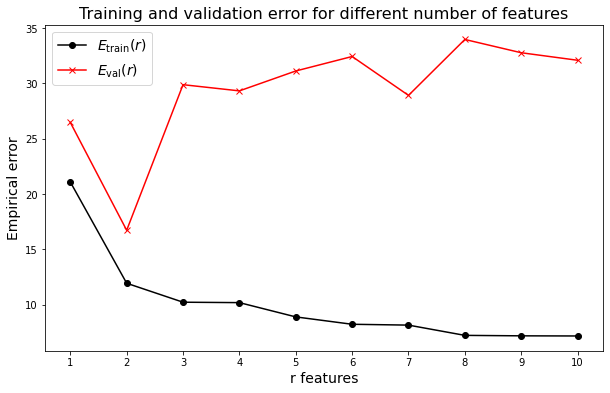

In [7]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('Training and validation error for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

In the figure, we can see that the validation error behaves very differently in comparison to the training error. The validation error obtains its minimum value at $r=2$ whereas the training error is monotonously decreasing with respect to $r$. It is clear that the training error is misleading as a measure of a model's performance on new data points.

While the validation error in the figure above exposes the uselessness of the training error, the simple validation scheme we used is not perfect either. If the dataset used for training and validation is not very large, the amount of data points in the validation set might be insufficient for reliably describing the distribution of data points in general. Consequently, the average error on the validation set might not accurately reflect the performance of the model on new data points.

For example, the validation error for $r=2$ is much lower than the training error in the figure above. Since ML models have a tendency to overfit the training set, the error on the validation set should not be lower than the training error if both sets accurately represent the distribution of the data. Therefore, we have a strong reason to believe that the validation set used in the task above just happens to fit the trained predictor for $r=2$ very well.

Fortunately, the reliability of the validation error can be easily improved by averaging multiple validation errors calculated using different training and validation sets. This approach is called $K$-fold cross-validation, and is presented next in more detail. 

## K-fold Cross-Validation

When the amount of data available for training and validation is limited, there is a trade-off between overfitting the training set and the reliability of the validation error. On one hand, a smaller training set makes the models more prone to overfitting, but on the other, a smaller validation set leads to a less reliable estimate of the model's generalization capability.

This problem can largely be avoided by using a more sophisticated validation method called **$K$-fold cross-validation**. In $K$-fold cross-validation, the data is first split into $K$ approximately equally sized subsets. Then, the subsets are used to calculate $K$ different estimates of the validation error, so that the $i$:th estimate is calculated using the $i$:th subset as the validation set and the remaining $K-1$ subsets as the training set. Finally, the $K$ estimates are averaged to obtain a final estimate of the validation error.


In [8]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # Specify the number of folds of split data into
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

# For all splits, print the validation and training indices
iteration = 0
for train_indices, test_indices in kf.split(X):
    iteration += 1
    X_train = X[train_indices,:]    # Get the training set    
    X_val = X[test_indices,:]    # Get the validation set
    print('Iteration {}:'.format(iteration))
    print('Indices for validation set:', test_indices)
    print('Indices for training set:', train_indices)
    print('X_val shape: {}, X_train shape: {} \n'.format(X_val.shape, X_train.shape))

Iteration 1:
Indices for validation set: [0 1 2 3]
Indices for training set: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 2:
Indices for validation set: [4 5 6 7]
Indices for training set: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 3:
Indices for validation set: [ 8  9 10 11]
Indices for training set: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 4:
Indices for validation set: [12 13 14 15]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 5:
Indices for validation set: [16 17 18 19]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
X_val shape: (4, 10), X_train shape: (16, 10) 



In [9]:
# 5-Fold Cross Validation
n = 10

X, y = load_housing_data(n=n)  # read in m data points with n features 

err_train = np.zeros(n)  # Array to store training errors
err_val = np.zeros(n)  # Array to store validation errors

K = 5
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

for r in range(n):
    train_errors_per_cv_iteration = []  # List for storing the training errors for the splits
    val_errors_per_cv_iteration = []  # List for storing the validation errors for the splits
    
    ### STUDENT TASK ###
    for train_indices, test_indices in kf.split(X):
        reg = LinearRegression(fit_intercept=False)    
        reg = reg.fit(X[train_indices,:(r+1)], y[train_indices])    
        y_pred_train = reg.predict(X[train_indices,:(r+1)])   
        train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))    
        y_pred_val = reg.predict(X[test_indices,:(r+1)])   
        val_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))   

    err_train[r] = np.mean(train_errors_per_cv_iteration)    
    err_val[r] = np.mean(val_errors_per_cv_iteration)    
    
print('Training errors for each K:')
print(err_train, '\n')
print('Validation error for each K:')
print(err_val, '\n')

Training errors for each K:
[20.87704832 12.13283556 11.99133814 11.69404557 10.25508494  9.81296876
  8.34799819  7.78641908  7.6120311   7.19009779] 

Validation error for each K:
[29.83810445 20.02364377 20.27418056 21.11979056 24.55366034 27.72574942
 34.52649721 41.03523487 42.49880828 50.15447637] 



In [10]:
# Perform sanity checks on the outputs
assert err_train.shape == (n,), "err_train is of the wrong shape!"
assert err_val.shape == (n,), "err_val is of the wrong shape!"
assert err_val[0] > err_val[1], "The second element of err_val should be smaller than the first element!"

print("Sanity checks passed!")


Sanity checks passed!


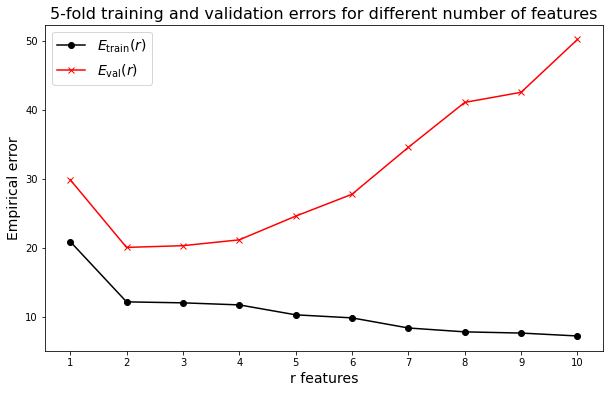

In [11]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n+1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n+1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('5-fold training and validation errors for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')         # Set label for x-axis
plt.xticks(range(1, n+1))      # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

If we compare the figure above to the one in the previous student task, we can see that the validation error obtained by 5-fold cross-validation seems to provide a more realistic estimate of the model's performance on new data. The validation error is now consistently larger than the training error, and the validation error seems less erratic. In practice, it is almost always preferable to use K-fold cross-validation instead of a single validation split for model validation and selection due to the increased robustness of the validation error.

With regards to the apartment price problem, we can conclude with reasonable confidence that the model with the best performance on new data points is the one using only the number of rooms and the percentage of apartments in the neighbourhood constructed before 1970 as its features. As such, it would seem that the experimental features in the dataset were not beneficial after all.

This example problem highlights the importance of using proper model validation. Since ML models nearly always overfit to some degree, it is important to estimate the true performance of the model before practical use by using model validation. 

##  Regularization

In the previous sections, we considered how to validate trained ML models to get high-quality estimates of their predictive capabilities. In the remainder of the notebook, we consider a tangential question - how to train an ML model so that the learned predictor generalizes better to new data than the predictor minimizing the average loss. 

Consider an ML method based on a large hypothesis space such as polynomials with a large degree. Large hypothesis spaces typically contain complex predictors that achieve very low training errors by overfitting the data. Thus, if we search for the optimal predictor in this hypothesis space (i.e., train the model) by minimizing the training error, we will obtain a predictor that overfits the training data and generalizes poorly to other data. However, there might be predictors in the hypothesis space that generalize much better to new data even though they have a higher average loss than the learned predictor. In order to learn these predictors, the model must be trained by minimizing some other quantity than the average loss.

**Regularization** is a technique in which models are trained using by minimizing a **cost function** that penalizes the complexity of a predictor function $h$. The cost function that is minimized when training a regularized model is composed of the average loss and an additional **penalty term**:


\begin{equation}
 \mathcal{E}(h) = \underbrace{\underbrace{(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2}}_{\mbox{ average loss}} + \underbrace{\alpha \mathcal{R}(h)}_{\mbox{anticipated increase of error (loss) on new data}}}_{\mbox{ estimate (approximation) of validation error }}.  
\end{equation}

The central idea of regularization is that the penalized cost function is minimized by a less complex predictor than the average loss. Thus, a model trained using the penalized cost function should, in general, have better generalization capabilities provided that the penalty term is well chosen. 

The penalty term itself is composed of two factors - a **regularization term** $\mathcal{R}(h)$ and a scaling factor $\alpha$. The former quantifies a function's complexity, and the latter scales the penalty by a specified factor. Effectively, $\alpha$ **offers a trade-off between the prediction error (training error) incurred on the training data and the complexity of a predictor**. Large $\alpha$ favor less complex predictor functions, while small $\alpha$ put more emphasis on obtaining a small average loss.


### The regularization term (choosing $\mathcal{R}(h)$)

In order to implement regularization in practice, we need to choose a regularization term $\mathcal{R}$ that quantifies the complexity of predictor functions in an appropriate way. Two widely used choices are the $\ell_1$ norm 

\begin{equation}
\|\mathbf{w} \|_1 = \sum_{i=1}^n |w_i|= |w_1| + |w_2| + \ldots + |w_n|
\end{equation}

and the squared $\ell_2$ norm

\begin{equation}
\|\mathbf{w} \|_2^2 = \sum_{i=1}^n w_i^2 = w_1^2 + w_2^2 + \ldots + w_n^2.
\end{equation}

Both of these alternatives are based on the premise that the complexity of a predictor increases with the magnitude of its parameters $w$.

### Hyperparameter tuning (choosing $\alpha$)

The $\alpha$ factor in the regularized cost function is a **hyperparameter** of the regularized model. In contrast to **model parameters**, hyperparameters are not optimized by training the model but must be defined in advance. The hyperparameters' values are typically chosen by selecting the value from a set of candidates that results in the lowest validation error for the trained model. This process is called **hyperparameter tuning** and can be seen as a case of model selection, in which the models differ by the values of the hyperparameters.

The hyperparameter tuning process for $\alpha$ proceeds roughly as follows:
1. we specify a list of candidate values for $\alpha$, 
2. for each choice of $\alpha$, we learn a predictor that minimizes the regularized cost function
3. for each choice of $\alpha$, we validate the trained predictor $h^{(\alpha)}_{\rm opt}$ by computing the validation error

\begin{equation}
E_{\rm val}^{(\alpha)} = (1/m_{\rm v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation}

4. We select the value of $\alpha$ with smallest validation error to be used in our final model 

Next, we will briefly consider two linear models that use different regularization terms $\mathcal{R}(h)$.

### Ridge Regression

Ridge regression is a linear model that uses the same linear hypothesis space as the standard linear regression model, but learns the optimal predictor by minimizing the penalized cost function with $\mathcal{R}(h)=\|\mathbf{w}\|_2^2=w_1^2 + w_2^2 + \ldots + w_n^2$. The cost function is 

\begin{equation}
 \mathcal{E}(\mathbf{w}, w_0) = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)} \big)^{2} + \alpha\|\mathbf{w}\|_2^2.  
\end{equation}

Since the regression weights are squared in the penalty term, Ridge regression harshly penalizes predictors with large individual feature weights. This feature makes ridge regression particularly useful for ML problems with many highly correlated features.

The presence of such features is called **multicollinearity**, and is associated with an unstable optimal predictor that is highly sensitive to the training data and thus generalizes poorly to new data. The instability stems from the fact that when the features are highly correlated, a large positive weight on feature can be "canceled out" by large negative weight on another. Ridge regression mitigates this problem by penalizing predictors with large individual feature weights and favoring predictors that have a better generalization capability.

In [12]:
from sklearn.linear_model import Ridge

n = 10
X, y = load_housing_data(n)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test

alpha = 10    # Define value of the regularization parameter 'alpha'

ridge = Ridge(alpha=alpha, fit_intercept=True)    # Create Ridge regression model
ridge.fit(X_train, y_train)    # Fit the Ridge regression model on the training set
y_pred = ridge.predict(X_train)    # Predict the labels of the training set
w_opt = ridge.coef_    # Get the optimal weights (regression coefficients) of the fitted model
err_train = mean_squared_error(y_pred, y_train)    # Calculate the training error

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

Optimal weights: 
 [ 1.62648008 -0.13079883  0.8888383  -0.58619617 -0.98729306  0.28057208
 -0.09922109  0.93619655 -0.14894959  0.13927532]
Training error: 
 13.682054265430256


### Lasso

Lasso is a linear model that uses the same hypothesis space as the standard linear regression model, but learns the optimal predictor by minimizing the regularized cost function with $\mathcal{R}(h)=\|\mathbf{w}\|_1=|w_1| + |w_2| + \ldots + |w_n|$. The cost function is of the form 

\begin{equation}
 \mathcal{E}(\mathbf{w}, w_0) = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)} \big)^{2} + \alpha\|\mathbf{w}\|_1.  
\end{equation}


In contrast to Ridge regression, Lasso does not square the feature weights in the penalty, and thus, both large and small feature weights are penalized proportionately. In practice, this often results in the model learning a predictor with some zero-valued regression weights since smaller weights are not penalized less than larger ones. As such, Lasso can be interpreted as a form of automatic feature selection!

In [13]:
from sklearn.linear_model import Lasso

X, y = load_housing_data(n)    # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)    # 80% training and 20% test

def fit_lasso(X_train, y_train, alpha_val):
    ### STUDENT TASK ###
    lasso = Lasso(alpha=alpha_val, fit_intercept=False)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    w_opt = lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    return w_opt, training_error

In [14]:
# Set alpha value
alpha_val = 1

# Fit Lasso and calculate optimal weights and training error using the function 'fit_lasso'
w_opt, training_error = fit_lasso(X_train, y_train, alpha_val)

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

# Perform some sanity checks on the outputs
from sklearn.linear_model import Lasso
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
assert training_error < 1000, "'training_error' is too large"
print('Sanity check tests passed!')


Optimal weights: 
 [ 4.95407593 -0.11692376  0.         -0.         -0.          0.
 -0.          0.          0.          0.        ]
Training error: 
 12.348567593049683
Sanity check tests passed!


In [15]:
# uning the Regularization Parameter in the Lasso with GridSearch
from sklearn.model_selection import GridSearchCV

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
params = {'alpha': alpha_values}
lasso = Lasso(fit_intercept=False)
cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
cv.fit(X, y)
err_train = abs(cv.cv_results_['mean_train_score'])
err_val = abs(cv.cv_results_['mean_test_score'])

In [16]:
# Perform some sanity checks on the outputs
assert err_train[0] > 0 and err_val[0] > 0, "Errors are negative!"
assert err_train.shape == (len(alpha_values),), "'err_train' has wrong shape"
assert err_val.shape == (len(alpha_values),), "'err_val' has wrong shape"
print('Sanity check tests passed!')


Sanity check tests passed!


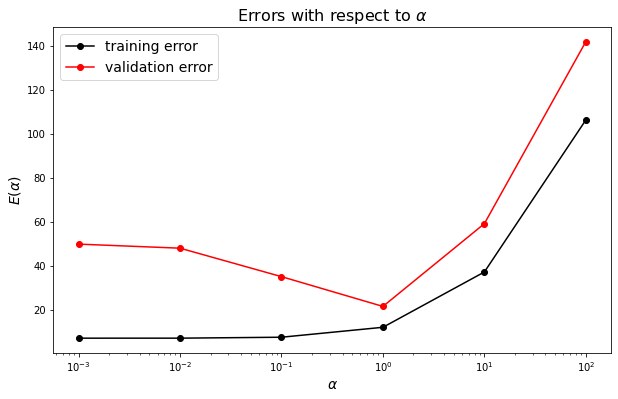

In [17]:
# Plot the training and validation errors
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(alpha_values, err_train, marker='o', color='black', label='training error')    # Plot training errors
plt.plot(alpha_values, err_val, marker='o', color='red', label='validation error')    # Plot validation errors
plt.xscale('log')    # Set x-axis to logarithmic scale
plt.xlabel(r'$\alpha$')    # Set label of x-axis
plt.ylabel(r'$E(\alpha)$')    # Set label of y-axis
plt.title(r'Errors with respect to $\alpha$', fontsize=16)    # Set title
plt.legend()    # Show legend
plt.show()

In the figure above, we can see that the optimal value for  𝛼  is  0.1  since this value results in the lowest validation error for the Lasso model.